In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from pickle import load
from tensorflow.keras.models import load_model

In [155]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [156]:
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000

In [157]:
model = load_model("model.h5")
scaler1 = load(open('scaler1.pkl', 'rb'))
scaler2 = load(open('scaler2.pkl', 'rb'))

In [158]:


from scipy.optimize import minimize, LinearConstraint
dfc = df[df['campaign']==9]
dfc = dfc.reset_index(drop=True)
R = np.array(dfc['Refractory lining before heating'])



In [159]:
# Setting initial condition

import random

randomlist = []
for i in range(dfc.shape[0]):
    n = random.randint(2,7)
    randomlist.append(np.abs(n))
# R0 = np.ones((dfc.shape[0],1))*4
# R0 = R
# R0 = np.zeros((dfc.shape[0],1))
R0 = randomlist
print(R0)

[4,
 6,
 7,
 6,
 4,
 6,
 7,
 3,
 7,
 2,
 6,
 4,
 5,
 7,
 6,
 2,
 5,
 3,
 5,
 5,
 4,
 7,
 7,
 5,
 3,
 2,
 4,
 4,
 2,
 4,
 5,
 6,
 4,
 6,
 2,
 2,
 6,
 6,
 3,
 6,
 5,
 7,
 7,
 7,
 4,
 2,
 2,
 5,
 7,
 4,
 7,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 7,
 2,
 7,
 2]

In [172]:
print(R0)

[4, 6, 7, 6, 4, 6, 7, 3, 7, 2, 6, 4, 5, 7, 6, 2, 5, 3, 5, 5, 4, 7, 7, 5, 3, 2, 4, 4, 2, 4, 5, 6, 4, 6, 2, 2, 6, 6, 3, 6, 5, 7, 7, 7, 4, 2, 2, 5, 7, 4, 7, 2, 2, 2, 2, 2, 5, 5, 7, 2, 7, 2]


In [160]:
def objective_function(Coef):
    dfc['Refractory lining before heating'] = Coef
    
    input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
             'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
    output_columns = ['Efficiency (MT/KWH)']
    X = dfc[input_columns]
    X_test = X.iloc[:,:].values
    y = dfc[output_columns]
    y_test = y.iloc[:,:].values
    normalized_X_test = scaler1.transform(X_test)
    normalized_y_test = scaler2.transform(y_test)
    pred_test = model.predict(normalized_X_test)
    y_pred_test = scaler2.inverse_transform(pred_test)
    sum_of_squares = np.sum(np.square(y_test-y_pred_test))
    return sum_of_squares

In [161]:

def inequality(Coef):
    A = np.zeros((dfc.shape[0]-1,dfc.shape[0]))
    for i in range(dfc.shape[0]-1):
        A[i,i] = 1
        A[i,i+1] = -1

 
    return np.matmul(A,Coef)-0.01


def equality1(Coef):
    return Coef[0]-R[0]

def equality2(Coef):
    return Coef[-1]-R[-1]

bounds = [(2, 7) for _ in range(dfc.shape[0])]
con1 = {'type':'ineq','fun':inequality}
con2 = {'type':'eq', 'fun':equality1}
con3 = {'type':'eq', 'fun':equality2}



con = [con1, con2, con3]






In [162]:
res = minimize(objective_function, x0 = R0, constraints=con,bounds=bounds,method='SLSQP',
               options={'ftol': 1e-8, 'disp': True})
res

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.48168316437323067
            Iterations: 2
            Function evaluations: 128
            Gradient evaluations: 2


     fun: 0.48168316437323067
     jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 128
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([6.70502646, 6.505     , 6.495     , 6.        , 5.85989346,
       5.84989346, 5.83989346, 5.82989346, 5.81989346, 5.025     ,
       5.015     , 5.005     , 4.995     , 4.985     , 4.975     ,
       4.81777778, 4.80777778, 4.79777778, 4.78777778, 4.77777778,
       4.76777778, 4.75777778, 4.74777778, 4.73777778, 4.64851852,
       4.63851852, 4.62851852, 4.61851852, 4.60851852, 4.59851852,
       4.58851852, 4.57851852, 4.56851852, 4.55851852, 4.54851852,
       4.53851852, 4.52851852, 4.51851852, 4.50851852, 4.49851852,
       4.48851852, 4.4

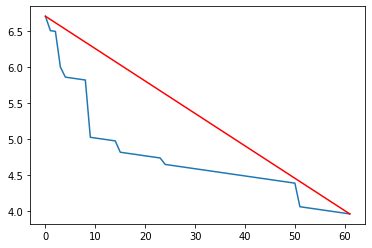

In [163]:
plt.figure()
plt.plot(res.x)
plt.plot(R,c='r')

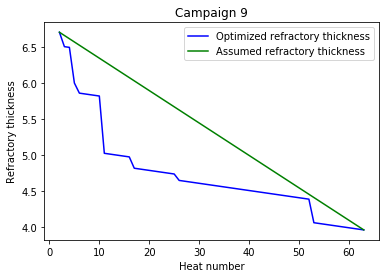

In [173]:
plt.plot(dfc['Heat number (life number)'],res.x,c='b');
plt.plot(dfc['Heat number (life number)'],R,c='g');
plt.xlabel('Heat number');
plt.ylabel('Refractory thickness');
plt.title('Campaign 9');
plt.legend(['Optimized refractory thickness','Assumed refractory thickness']);
plt.show();

In [165]:
res.x

array([6.70502646, 6.505     , 6.495     , 6.        , 5.85989346,
       5.84989346, 5.83989346, 5.82989346, 5.81989346, 5.025     ,
       5.015     , 5.005     , 4.995     , 4.985     , 4.975     ,
       4.81777778, 4.80777778, 4.79777778, 4.78777778, 4.77777778,
       4.76777778, 4.75777778, 4.74777778, 4.73777778, 4.64851852,
       4.63851852, 4.62851852, 4.61851852, 4.60851852, 4.59851852,
       4.58851852, 4.57851852, 4.56851852, 4.55851852, 4.54851852,
       4.53851852, 4.52851852, 4.51851852, 4.50851852, 4.49851852,
       4.48851852, 4.47851852, 4.46851852, 4.45851852, 4.44851852,
       4.43851852, 4.42851852, 4.41851852, 4.40851852, 4.39851852,
       4.38851852, 4.06164054, 4.05164054, 4.04164054, 4.03164054,
       4.02164054, 4.01164054, 4.00164054, 3.99164054, 3.98164054,
       3.97164054, 3.96164054])

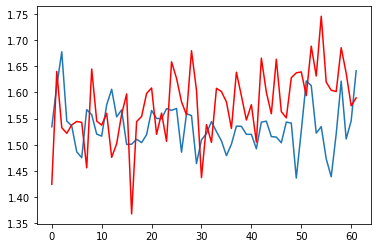

In [166]:
dfc['Refractory lining before heating'] = res.x

input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
         'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']
X = dfc[input_columns]
X_test = X.iloc[:,:].values
y = dfc[output_columns]
y_test = y.iloc[:,:].values
normalized_X_test = scaler1.transform(X_test)
normalized_y_test = scaler2.transform(y_test)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

plt.figure()

plt.plot(y_pred_test)
plt.plot(y_test,c='r')



In [167]:
dfc['Refractory lining before heating'] = R
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
             'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']
X = dfc[input_columns]
X_test = X.iloc[:,:].values
y = dfc[output_columns]
y_test = y.iloc[:,:].values
normalized_X_test = scaler1.transform(X_test)
normalized_y_test = scaler2.transform(y_test)
pred_test_prev = model.predict(normalized_X_test)
y_pred_test_prev = scaler2.inverse_transform(pred_test_prev)

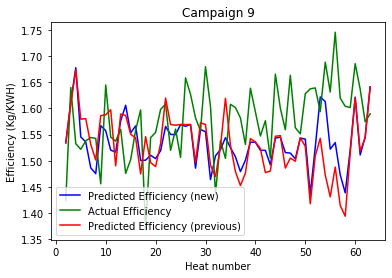

In [170]:
plt.plot(dfc['Heat number (life number)'],y_pred_test,c='b');
plt.plot(dfc['Heat number (life number)'],y_test,c='g');
plt.plot(dfc['Heat number (life number)'],y_pred_test_prev,c='r');
plt.xlabel('Heat number');
plt.ylabel('Efficiency (Kg/KWH)');
plt.title('Campaign 9');
plt.legend(['Predicted Efficiency (new)','Actual Efficiency','Predicted Efficiency (previous)']);
plt.show();

In [171]:
for i in range(1):
    print(output_columns[i])
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
R2 score is -0.7220244741858088
Test NMSE score is 172.20244741858087
